In [301]:
import numpy as np
import pandas as pd
df = pd.read_csv("Bank_Loan_Granting.csv")

In [302]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [304]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')

In [305]:
df['CCAvg'] = df['CCAvg'].astype(float)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [307]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [308]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

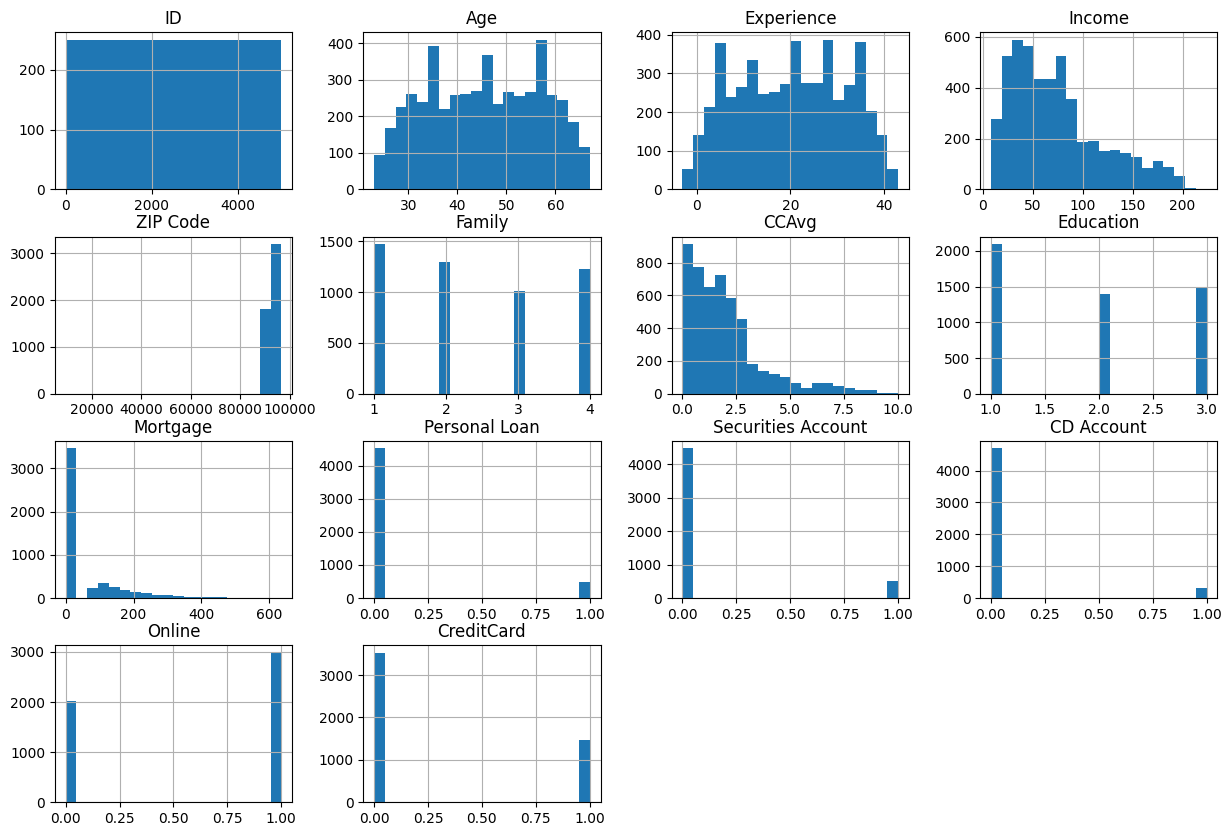

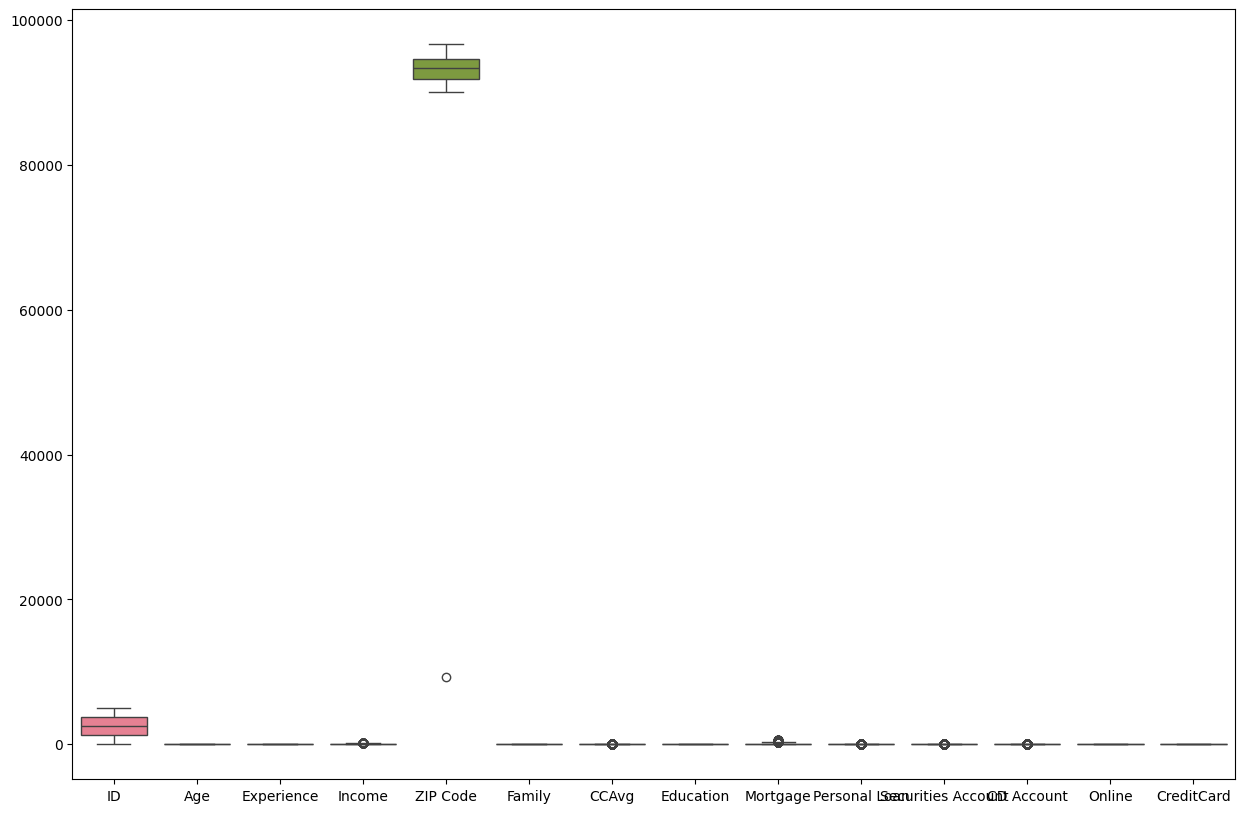

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15,10))
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

In [310]:
num_df = pd.DataFrame(df)

def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Menerapkan fungsi pada setiap kolom DataFrame
outlier_count = num_df.apply(find_outliers)

# Membuat DataFrame untuk hasil analisis outlier
outlier_df = pd.DataFrame({'feature': outlier_count.index, 'outlier_count': outlier_count.values})

# Menampilkan hasil analisis outlier untuk fitur dengan jumlah outlier lebih dari 0
outlier = outlier_df[outlier_df['outlier_count'] > 0]

print(outlier)

               feature  outlier_count
3               Income             96
4             ZIP Code              1
6                CCAvg            324
8             Mortgage            291
9        Personal Loan            480
10  Securities Account            522
11          CD Account            302


In [311]:
df = df.drop(df[df['Experience'] < 0].index)

In [312]:
df.shape

(4948, 14)

In [313]:
df = df.drop(columns=['ID','ZIP Code'])

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4948 non-null   int64  
 1   Experience          4948 non-null   int64  
 2   Income              4948 non-null   int64  
 3   Family              4948 non-null   int64  
 4   CCAvg               4948 non-null   float64
 5   Education           4948 non-null   int64  
 6   Mortgage            4948 non-null   int64  
 7   Personal Loan       4948 non-null   int64  
 8   Securities Account  4948 non-null   int64  
 9   CD Account          4948 non-null   int64  
 10  Online              4948 non-null   int64  
 11  CreditCard          4948 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 502.5 KB


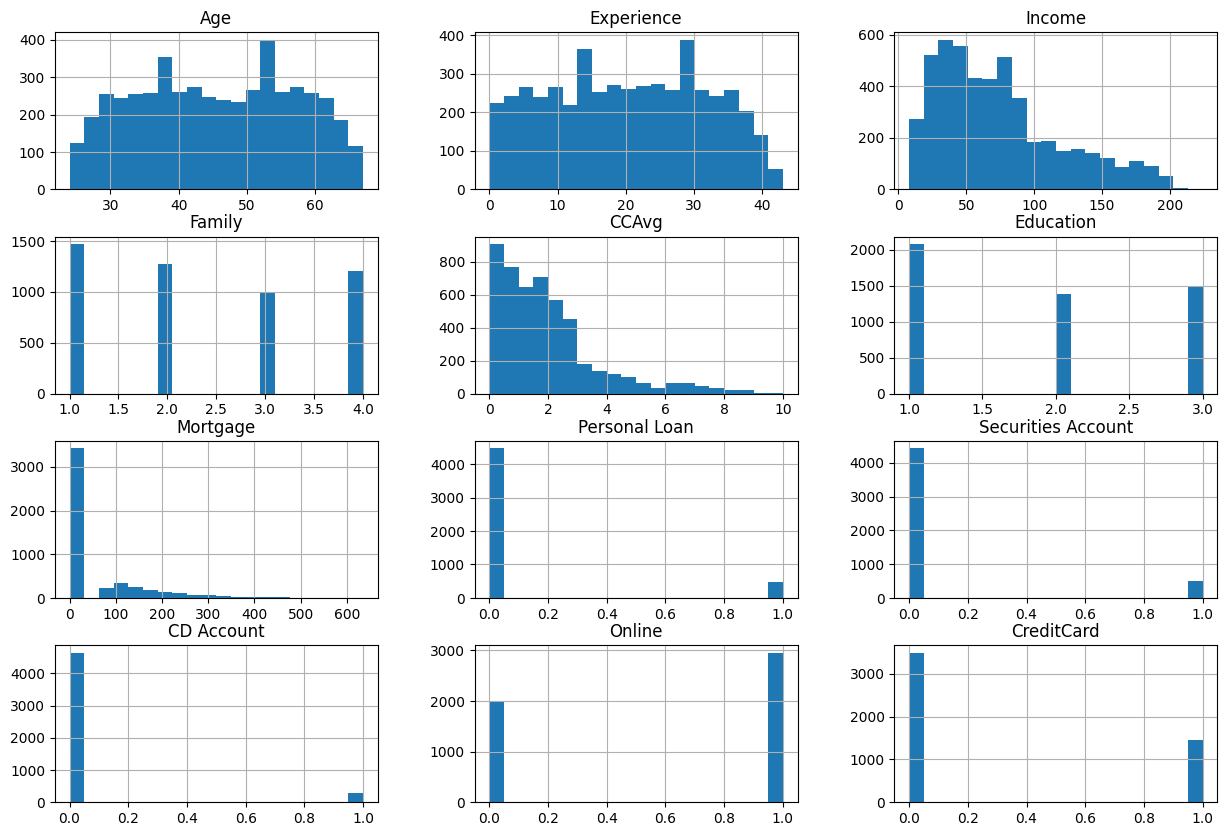

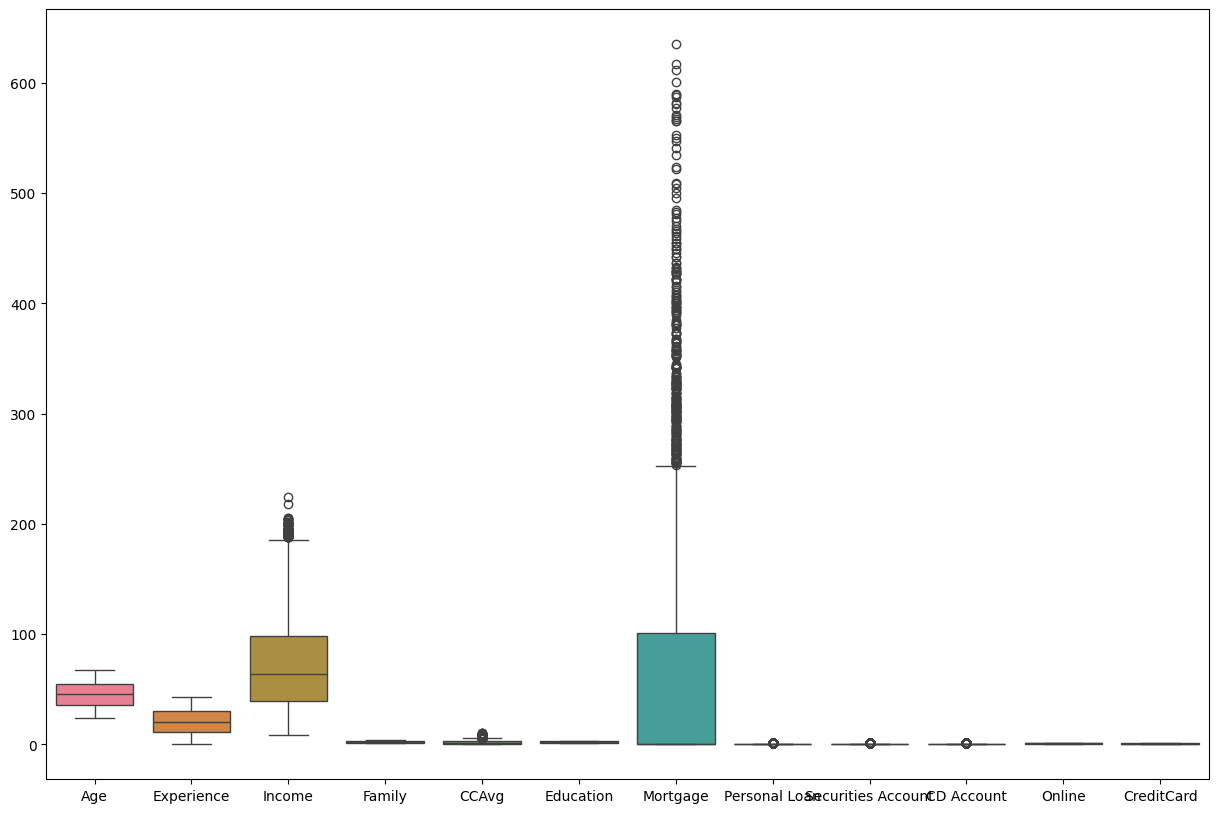

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15,10))
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

In [316]:
df.shape

(4948, 12)

In [321]:
from sklearn.model_selection import train_test_split

input_df = df.drop('Personal Loan',axis = 1)
output_df = df['Personal Loan']

# Data yg telah diperbarui menjadi set train dan sisa dataset
x_train,X_test,y_train,Y_test = train_test_split(input_df,output_df, test_size=0.2,random_state=42)
# Data sisa dibagi menjadi set train dan set validasi
x_val,x_test,y_val,y_test = train_test_split(x_train,y_train, test_size=0.5,random_state=42)

#ukuran setiap subset
print('Jumlah data asli:',len(input_df))
print("Jumlah data pada train set:", len(x_train))
print("Jumlah data pada validation set:", len(x_val))
print("Jumlah data pada test set:", len(x_test))

Jumlah data asli: 4948
Jumlah data pada train set: 3958
Jumlah data pada validation set: 1979
Jumlah data pada test set: 1979


In [322]:
from sklearn.preprocessing import RobustScaler

# Scaling train set predictors using MinMaxScaler
scaler = RobustScaler()
column = x_train.columns
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=column)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.65,0.70,-0.066667,1.0,0.315789,-0.5,2.316832,0.0,0.0,0.0,1.0
1,-1.05,-1.00,0.016667,1.0,-0.684211,-0.5,0.000000,1.0,0.0,-1.0,0.0
2,-0.30,-0.20,-0.016667,-0.5,0.000000,0.5,0.000000,0.0,0.0,-1.0,0.0
3,-0.25,-0.15,0.016667,0.5,0.315789,0.5,0.000000,0.0,0.0,0.0,0.0
4,-0.80,-0.75,0.950000,0.0,0.842105,-0.5,4.039604,0.0,0.0,0.0,0.0


In [323]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=column)
x_val = pd.DataFrame(scaler.fit_transform(x_val), columns=column)

In [338]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(input, num_class):
  model = Sequential([
      Dense(2*input, input_dim=input, activation='relu'),
      Dense(2*input, activation='relu'),
      Dense(num_class, activation='softmax')
  ])
  return model
input = x_train.shape[1]
num_class = 2
model = create_model(input, num_class)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
train = model.fit(x_train,y_train, batch_size = 64, epochs= 10,validation_data=(x_val,y_val))

test_cross, accuracy = model.evaluate(x_test,y_test)
print('Test loss:',test_cross)
print('Accuracy:',accuracy)

Epoch 1/10
62/62 [==============================] - 2s 11ms/step - loss: 0.4606 - accuracy: 0.8770 - val_loss: 0.3372 - val_accuracy: 0.9020
Epoch 2/10
62/62 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.9020 - val_loss: 0.2220 - val_accuracy: 0.9085
Epoch 3/10
62/62 [==============================] - 0s 4ms/step - loss: 0.1918 - accuracy: 0.9270 - val_loss: 0.1671 - val_accuracy: 0.9368
Epoch 4/10
62/62 [==============================] - 0s 4ms/step - loss: 0.1504 - accuracy: 0.9459 - val_loss: 0.1364 - val_accuracy: 0.9454
Epoch 5/10
62/62 [==============================] - 0s 4ms/step - loss: 0.1269 - accuracy: 0.9543 - val_loss: 0.1174 - val_accuracy: 0.9611
Epoch 6/10
62/62 [==============================] - 0s 4ms/step - loss: 0.1131 - accuracy: 0.9613 - val_loss: 0.1048 - val_accuracy: 0.9611
Epoch 7/10
62/62 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9654 - val_loss: 0.0955 - val_accuracy: 0.9687
Epoch 8/10
62/62 [=

In [325]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
y_pred = model.predict(x_test)
y_predict = np.argmax(y_pred, axis=1)
# Menghitung accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

# Menghitung precision, recall, dan F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:",f1_score)

62/62 [==============================] - 0s 1ms/step
Accuracy: 0.9671551288529561
Precision: 0.9294871794871795
Recall: 0.7286432160804021
F1-Score: 0.8169014084507042


In [326]:
tf.keras.backend.clear_session()

In [327]:
def modified_model(input,num_class):
    model = Sequential([
        Dense(4*input, input_dim=input, activation='relu'),
        Dense(2*input, input_dim=input, activation='relu'),
        Dense(2*input, input_dim=input, activation='relu'),
        Dropout(0.2),
        Dense(num_class, activation='softmax')
    ])
    return model
input = x_train.shape[1]
num_class = 2
model = create_model(input, num_class)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
train = model.fit(x_train,y_train, batch_size = 64, epochs= 10,validation_data=(x_val,y_val))

test_cross, accuracy = model.evaluate(x_test,y_test)
print('Test loss:',test_cross)
print('Accuracy:',accuracy)

Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.5170 - accuracy: 0.8401 - val_loss: 0.4074 - val_accuracy: 0.9020
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0.9010 - val_loss: 0.2722 - val_accuracy: 0.9050
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9161 - val_loss: 0.1964 - val_accuracy: 0.9298
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9384 - val_loss: 0.1613 - val_accuracy: 0.9378
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.9467 - val_loss: 0.1371 - val_accuracy: 0.9535
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9543 - val_loss: 0.1213 - val_accuracy: 0.9596
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1148 - accuracy: 0.9593 - val_loss: 0.1112 - val_accuracy: 0.9631
Epoch 8/20
40/40 [==

In [328]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
y_pred = model.predict(x_test)
y_predict = np.argmax(y_pred, axis=1)
# Menghitung accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

# Menghitung precision, recall, dan F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:",f1_score)

62/62 [==============================] - 0s 1ms/step
Accuracy: 0.9742294087923193
Precision: 0.9252873563218391
Recall: 0.8090452261306532
F1-Score: 0.8632707774798928
